<div class="alert alert-danger" role="alert">
    <span style="font-size:20px">&#9888;</span> <span style="font-size:16px">This is a read-only notebook! If you want to make and save changes, save a copy by clicking on <b>File</b> &#8594; <b>Save a copy</b>. If this is already a copy, you can delete this cell.</span>
</div>

In [1]:
# Load in Python libraries
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# Temporary Developer's code
%load_ext autoreload
%autoreload 2

In [8]:
# Add path of the folder 'resources' to the path from which we can import modules  
import sys
sys.path.append('../utilities')
from clustering.kmeans import execute_KMeans, KMeans_range


# Read in data

In [9]:
# Load in the data
soccer_data = pd.read_csv("sample_inputs/soccer.csv")

In [10]:
# Look at the top 10 rows
pd.set_option('display.max_columns', None) # Show all columns -- only use if needed and data is not extremely wide
soccer_data.head(10)

,player_api_id,player_name,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,foot,attack_work_rate,defense_work_rate,height,weight,attacking,skill,movement,power,mentality,defending,goalkeeping,avg,fix_crossing,fix_short_passing,fix_finishing,fix_volleys,fix_heading_accuracy,fix_dribbling,fix_curve,fix_free_kick_accuracy,fix_long_passing,fix_ball_control,fix_acceleration,fix_sprint_speed,fix_agility,fix_reactions,fix_balance,fix_shot_power,fix_jumping,fix_stamina,fix_strength,fix_long_shots,fix_aggression,fix_interceptions,fix_positioning,fix_vision,fix_penalties,fix_marking,fix_standing_tackle,fix_sliding_tackle,fix_gk_diving,fix_gk_handling,fix_gk_kicking,fix_gk_positioning,fix_gk_reflexes
0,2625,"Patryk Rachwal,18",60.5,61.0,50.0,47.0,46.0,53.0,38.0,56.0,50.0,50.0,66.0,58.0,67.0,63.0,67.0,49.0,76.0,68.0,56.0,77.0,56.0,58.0,71.0,64.0,49.0,55.0,66.0,63.0,63.0,54.0,12.0,11.0,6.0,8.0,8.0,1.0,2.0,1,175.26,154,46.8,56.0,64.4,63.0,61.0,60.000000,9.0,50.939394,-0.939394,2.060606,-3.939394,-12.939394,-4.939394,5.060606,-0.939394,-0.939394,15.060606,7.060606,16.060606,12.060606,16.060606,-1.939394,25.060606,17.060606,5.060606,26.060606,5.060606,7.060606,20.060606,13.060606,-1.939394,4.060606,15.060606,12.060606,12.060606,3.060606,-38.939394,-39.939394,-44.939394,-42.939394,-42.939394
1,2752,Diego Mainz,70.0,71.0,36.0,37.0,72.0,55.0,20.0,45.0,30.0,16.0,60.0,56.0,39.0,34.0,43.0,62.0,42.0,57.0,55.0,59.0,84.0,17.0,82.0,72.0,31.0,52.0,35.0,74.0,73.0,65.0,11.0,6.0,7.0,9.0,15.0,1.0,2.0,1,187.96,174,44.0,41.4,44.0,54.4,54.4,70.666667,9.6,43.969697,-7.969697,11.030303,-6.969697,-23.969697,28.030303,1.030303,-13.969697,-27.969697,16.030303,12.030303,-4.969697,-9.969697,-0.969697,18.030303,-1.969697,13.030303,11.030303,15.030303,40.030303,-26.969697,38.030303,28.030303,-12.969697,8.030303,-8.969697,30.030303,29.030303,21.030303,-32.969697,-37.969697,-36.969697,-34.969697,-28.969697
2,2768,Jose Dorado,72.0,73.0,42.0,42.0,69.0,68.0,28.0,39.0,53.0,19.0,56.0,58.0,57.0,55.0,58.0,72.0,61.0,38.0,77.0,52.0,70.0,20.0,62.0,78.0,38.0,57.0,25.0,74.0,73.0,81.0,11.0,14.0,12.0,13.0,9.0,-1.0,2.0,1,180.34,154,49.8,45.0,60.6,51.4,52.0,76.000000,11.8,47.909091,-5.909091,20.090909,-5.909091,-19.909091,21.090909,-8.909091,5.090909,-28.909091,8.090909,10.090909,9.090909,7.090909,10.090909,24.090909,13.090909,-9.909091,29.090909,4.090909,22.090909,-27.909091,14.090909,30.090909,-9.909091,9.090909,-22.909091,26.090909,25.090909,33.090909,-36.909091,-33.909091,-35.909091,-34.909091,-38.909091
3,2770,Ignacio Gonzalez,71.0,72.0,62.0,68.0,71.0,72.0,69.0,71.0,84.0,71.0,70.0,76.0,63.0,54.0,63.0,65.0,62.0,72.0,56.0,47.0,61.0,74.0,56.0,41.0,70.0,73.0,69.0,33.0,43.0,25.0,12.0,13.0,6.0,14.0,15.0,1.0,2.0,1,180.34,161,68.4,74.4,61.4,62.0,61.8,33.666667,12.0,54.575758,7.424242,17.424242,13.424242,14.424242,16.424242,16.424242,29.424242,16.424242,15.424242,21.424242,8.424242,-0.575758,8.424242,10.424242,7.424242,17.424242,1.424242,-7.575758,6.424242,19.424242,1.424242,-13.575758,15.424242,18.424242,14.424242,-21.575758,-11.575758,-29.575758,-42.575758,-41.575758,-48.575758,-40.575758,-39.575758
4,2790,Alberto Rey,71.0,76.0,71.0,37.0,55.0,68.0,43.0,64.0,67.0,56.0,71.0,67.0,71.0,71.0,65.0,69.0,67.0,46.0,61.0,75.0,72.0,42.0,67.0,60.0,62.0,60.0,54.0,77.0,77.0,69.0,8.0,21.0,71.0,21.0,21.0,-1.0,0.0,1,175.26,163,54.8,65.0,68.6,59.2,60.6,74.333333,28.4,57.757576,13.242424,10.242424,-20.757576,-14.757576,-2.757576,6.242424,9.242424,-1.757576,13.242424,9.242424,13.242424,13.242424,7.242424,11.242424,9.242424,-11.757576,3.242424,17.242424,14.242424,-15.757576,9.242424,2.242424,4.242424,2.242424,-3.757576,19.242424,19.242424,11.242424,-49.757576,-36.7575

### Other type of optional pre-processing to be added 

# Perform K-means analysis for a specific number of clusters

c:\repos\gryphonrepos_existing\gryphon-data-clustering\template\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\repos\gryphonrepos_existing\gryphon-data-clustering\template\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\repos\gryphonrepos_existing\gryphon-data-clustering\template\venv\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\repos\gryphonrepos_existing\gryphon-data-clustering\template\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keywor

{'model': KMeans(n_clusters=3),
 'data':        crossing  finishing  heading_accuracy  short_passing  dribbling  \
 0     -0.197272  -0.051789         -0.643964      -0.569205  -0.084118   
 1     -1.028760  -0.589339          0.968500      -0.424591  -0.717897   
 2     -0.672408  -0.320564          0.782446       0.515402  -1.063594   
 3      0.515431   1.077065          0.906482       0.804630   0.780125   
 4      1.049958  -0.589339         -0.085803       0.515402   0.376811   
 ...         ...        ...               ...            ...        ...   
 10577 -0.672408  -0.213054         -0.581946      -0.135362  -0.084118   
 10578  0.099687  -1.073133         -0.395893      -1.870734   0.549660   
 10579 -0.316056  -1.180643          0.038232      -0.858434  -0.948362   
 10580 -1.088152   0.485761         -0.085803      -0.063055   0.031114   
 10581 -0.375448  -0.481829         -0.209839      -0.063055  -0.199351   
 
        free_kick_accuracy  sprint_speed  ball_control  re

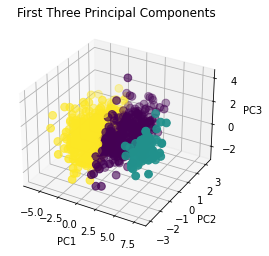

In [11]:
execute_KMeans(dataset = soccer_data, 
               variables = ['crossing', 'finishing', 'heading_accuracy', 'short_passing','dribbling', 'free_kick_accuracy', 'sprint_speed', 'ball_control', 'reactions', 'agility', 'sliding_tackle'],
               num_clusters = 3, 
               standardize_vars = True, 
               generate_charts = True)

# Perform K-means analysis for a range of clusters

Working on 2 clusters


c:\repos\gryphonrepos_existing\gryphon-data-clustering\template\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\repos\gryphonrepos_existing\gryphon-data-clustering\template\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\repos\gryphonrepos_existing\gryphon-data-clustering\template\venv\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\repos\gryphonrepos_existing\gryphon-data-clustering\template\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keywor

Working on 3 clusters


c:\repos\gryphonrepos_existing\gryphon-data-clustering\template\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\repos\gryphonrepos_existing\gryphon-data-clustering\template\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\repos\gryphonrepos_existing\gryphon-data-clustering\template\venv\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\repos\gryphonrepos_existing\gryphon-data-clustering\template\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keywor

Working on 4 clusters


c:\repos\gryphonrepos_existing\gryphon-data-clustering\template\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\repos\gryphonrepos_existing\gryphon-data-clustering\template\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\repos\gryphonrepos_existing\gryphon-data-clustering\template\venv\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\repos\gryphonrepos_existing\gryphon-data-clustering\template\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keywor

Working on 5 clusters


c:\repos\gryphonrepos_existing\gryphon-data-clustering\template\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\repos\gryphonrepos_existing\gryphon-data-clustering\template\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\repos\gryphonrepos_existing\gryphon-data-clustering\template\venv\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\repos\gryphonrepos_existing\gryphon-data-clustering\template\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keywor

{2: {'model': KMeans(n_clusters=2),
  'data':        crossing  finishing  heading_accuracy  short_passing  dribbling  \
  0          50.0       47.0              46.0           53.0       56.0   
  1          36.0       37.0              72.0           55.0       45.0   
  2          42.0       42.0              69.0           68.0       39.0   
  3          62.0       68.0              71.0           72.0       71.0   
  4          71.0       37.0              55.0           68.0       64.0   
  ...         ...        ...               ...            ...        ...   
  10577      42.0       44.0              47.0           59.0       56.0   
  10578      55.0       28.0              50.0           35.0       67.0   
  10579      48.0       26.0              57.0           49.0       41.0   
  10580      35.0       57.0              55.0           60.0       58.0   
  10581      47.0       39.0              53.0           60.0       54.0   
  
         free_kick_accuracy  sprint_speed

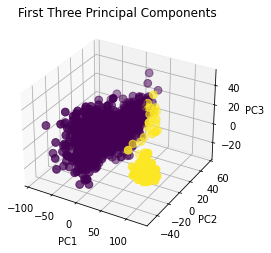

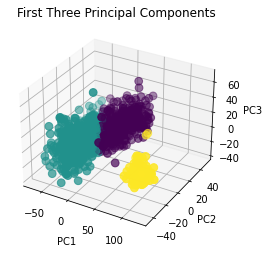

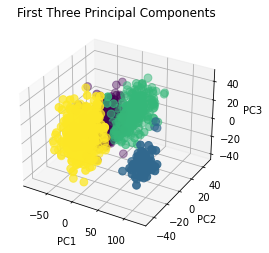

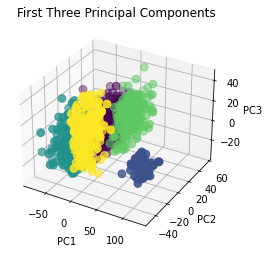

In [13]:
KMeans_range(dataset = soccer_data, 
               variables = ['crossing', 'finishing', 'heading_accuracy', 'short_passing','dribbling', 'free_kick_accuracy', 'sprint_speed', 'ball_control', 'reactions', 'agility', 'sliding_tackle'],
               min_clusters = 2, max_clusters = 5,
               standardize_vars = True, 
               generate_charts = True)